# Time Series with Fast Fourier Transform
Time series is a series of data indexed over time. The time can be in order of seconds to all the way to years or decades.  Time series forecasting is a way of predicting future events based on past patterns of data over time. 
Time series analysis and forecasting are crucial for predicting future trends, behaviors, and behaviours based on historical data. Mostly useful to make informed decisions and identify potential risks. It aids in planning, budgeting, and strategizing across various domains of idustries, healthcare, etc. 

## Why Fast Fourier Transform (FFT) ?
Transforming the data into the frequency domain allows to gain insights into the underlying patterns and characteristics of the signal.

When performing a Fast Fourier Transform (FFT) analysis, the time-domain signal is transformed into the frequency domain, and the power or amplitude of each frequency component is calculated. These frequency components are organized into a series of equally spaced intervals called frequency bins. Frequency bins are discrete intervals that represent the range of frequencies in the frequency domain of a signal.

Let's start with a simple univariate time-series database!!

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading dataset
This is an Air passengers dataset having two columns containing the time in month-year and the number of passengers travelled.

Dataset link: https://www.kaggle.com/datasets/rakannimer/air-passengers

In [2]:
df_air = pd.read_csv("Dataset/AirPassengers_time_series.csv")

In [3]:
df_air.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df_air = df_air.set_index('Month')

In [5]:
df_air.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


Text(0.5, 1.0, 'Air passengers dataset')

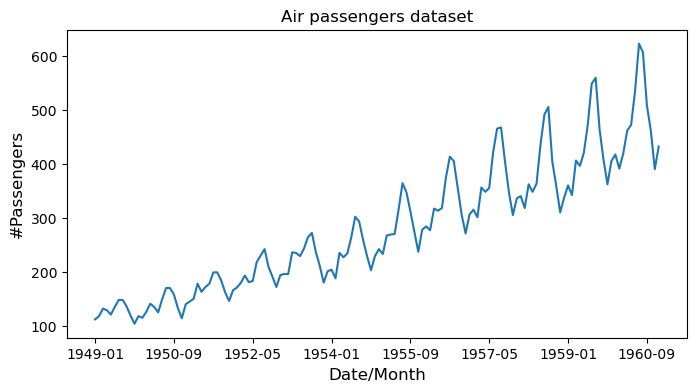

In [6]:
## Plotting the dataset 
fig,ax = plt.subplots(figsize=(8,4))
df_air['#Passengers'].plot(kind='line')
ax.set_xlabel('Date/Month',fontsize=12)
ax.set_ylabel('#Passengers',fontsize=12)
ax.set_title('Air passengers dataset',fontsize=12)

## Components of Time-Series

-  <b>Trend:</b> The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary). This is also called the DC-component in engineering terms.
-  <b>Seasonality:</b> The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. 
-  <b>Cyclical Component:</b> These are the trends with no set repetition over a particular period of time.
-  <b>Noise or irregularity:</b> parts of the time-series which can not be attributed to either the trend of seasonal components and are the result of random variations in the data.

## Decomposing a time-series signal into trend and seasonal variances with Scipy filters

This uses a savgol_filter (Savitzky-Golay filter) of the scipy package, which is useful to smoothen out a signal and remove noise. The Savitzky-Golay filter contains only two parameters; the window length l and the polynomial order n. The filter will operate depending on the choice of l and n. 

<li> If the time-series contains interesting local structures that you do not want to be smoothed out but you still want to remove the noise, you can decrease l and increase n. </li>
<li>If you want to capture only the very global trend (as we have done) in your time-series you can increase l and decrease n. </li>
<li>To calculate the trend we have chosen a window length l= 25 and a polynomial order n = 1. </li>

To get the seasonal component of the time-series dataset, we simply have to subtract the global trend 



In [7]:
y_val = df_air['#Passengers'].values
x_val = df_air.index.values
print ("x-val:", x_val[:10])
print ("\n y-val:",y_val[:10])

x-val: ['1949-01' '1949-02' '1949-03' '1949-04' '1949-05' '1949-06' '1949-07'
 '1949-08' '1949-09' '1949-10']

 y-val: [112 118 132 129 121 135 148 148 136 119]


In [8]:
## Savgol filter smoothens out a signal and increases the precision of the data without distorting the signal tendency.

y_val_trend = savgol_filter(y_val, 25, 1)     ## window length(l) = 25, poly degree = 1
y_val_seasonal = y_val - y_val_trend


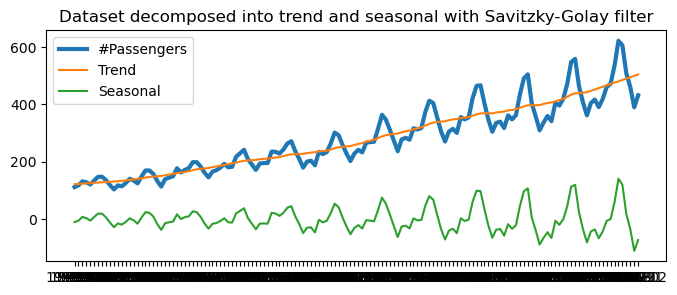

In [9]:
## Plotting part
fix, ax0 = plt.subplots(figsize=(8,3))
ax0.plot(x_val, y_val, label='#Passengers', linewidth=3)
ax0.plot(x_val, y_val_trend, label='Trend')
ax0.plot(x_val, y_val_seasonal, label='Seasonal')
ax0.legend()
ax0.set_title("Dataset decomposed into trend and seasonal with Savitzky-Golay filter")
plt.show()

The observations from the above plot are:
<li> The blue line is the actual time-series signal or data </li>
<li>The orange line represents the global trends (here it is an increasing trend) </li>
<li>The green line is the seasonal variance, that is obtained by subtracting the trend from the data (green = blue-orange). The trend is removed and so it appears to be a flatter line with variance shown </li>

## Analysing a time-series with Stochastic Signal Analysis techniques
Stochastic signal analysis techniques are ideal for analysing time-series data and forecasting them. Fourier transform (FT) is the most important technique used to achieve this. The FT transforms a signal from time domain to its frequency domain. The frequency domain determines any seasonal components (short-term seasonal cycle which repeats itself multiple times or seasonal variances in data) in the time-series data and the position of occurences and how to separate them.

### Construction of the frequency spectrum from the time-domain
Lets find out by applying the Fourier transform on our data or signal. We have our data in form of time-signal (variation of no.of pasengers with time) as shown in the plot above. We now wish to convert this time-series data into its frequency domain.

In [10]:
y_val = df_air['#Passengers'].values
print ("Shape of time-domain of y_val is:", y_val.shape)
print ("Values of time-domain: \n", y_val[:10])        ## print only first 10 values in time-domain

Shape of time-domain of y_val is: (144,)
Values of time-domain: 
 [112 118 132 129 121 135 148 148 136 119]


In [11]:
## Fourier transform
y_fft = np.fft.fft(y_val)
print ("Shape of Fourier transform of y_val is:", y_fft.shape)
print ("Values of frequency-domain: \n", y_fft[:10])        ## print only first 10 values in freq-domain

Shape of Fourier transform of y_val is: (144,)
Values of frequency-domain: 
 [40363.           +0.j           855.03234509+8906.55957752j
   -48.11511547+4098.69668909j   517.59389868+3225.75142471j
  -137.07676224+2323.01116615j  -213.4231888 +2009.36100487j
   -93.89149881+1291.59342203j  -134.81798293+1255.57847375j
  -135.03867759+1379.3293578j   -240.18002361+1088.68680451j]


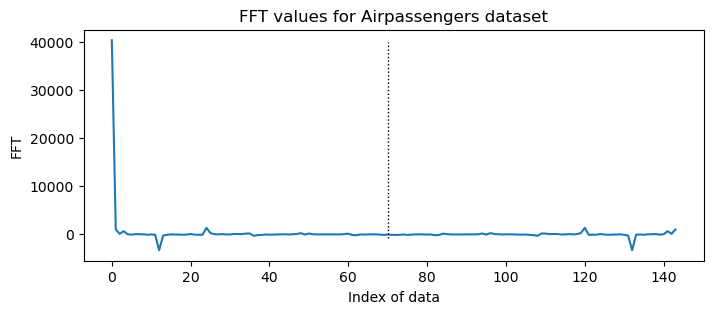

In [12]:
## Plotting part
fig, ax1 = plt.subplots(figsize = (8,3))
ax1.plot(y_fft)
ax1.set_xlabel("Index of data")   ## 144 entries or data.shape
ax1.set_ylabel("FFT")
ax1.set_title("FFT values for Airpassengers dataset")
plt.vlines(x = 70, ymin=-1000, ymax=40000, colors='k', ls=':',lw=1)
plt.show()

<ol>
The key observations from the FT plots are:

<li> The frequency spectra has negative and positive amplitude. The reason for observing negative frequencies is because the Fourier transform is a measure for the correlation of the cosine at that frequency with the signal. Since a correlation can be negative (indicating a 180 degree phase shift) we can also have negative amplitudes in the frequency spectrum. </li>

<li> The black vertical line acts as a mirror for left and right side of frequency spectrum. For real-valued signal the cosine raltionship can be decomposed into positive and negative part. Usually the positive frequencies increase up to the Nyquist frequency and after the Nyquist frequency we will see the negative frequencies which are a mirror image (complex conjugated) of the positive ones. This means that if the we have time-series which only contains real-values (which it usually does), the FFT will be perfectly symmetric around the center / nyquist frequency. </li>

<li> The left side (indicates positive frequencies) and right side (indicates negative frequencies). The frequency at the center of the frequency spectrum is the Nyquist frequency. </li>

<li> There is a peak frequency at the position (0,0) indicating the DC component. As time period varies inversely with frequency. Therefore a large peak at zero frequency in FFT, indicates an infinite time period (i.e. a component which is simply a flat line). This indicates the presence of an bias offset and the average y-value in the signal is not zero. </li>
</ol>

## To obtain a more interpretable frequency signal
We need to perform these three steps:
<li> First detrend the signal (or subtract the average value from the time-series) in order to remove the large peak at zero frequency, </li>
<li> Take the absolute value of frequency spectrum in order to make the negative amplitudes positive and </li>
<li> Only take into account the first half of the frequency spectrum (since the second half is a mirror image). </li>

Let's follow these steps and look how the frequenct signal will look like:

In [13]:
from scipy.signal import savgol_filter
y_val = df_air['#Passengers'].values
y_val_trend = savgol_filter(y_val, 25,1)     ## captures the global trend (average value) with window length (l) =25 and poly degree (n)=1
y_val_seasonal = y_val - y_val_trend         ## captures the seasonal variance

## Plots the entire frequency range in positive and negative sides with real and imaginary part also

In [14]:
## x-values or frequency bins
fft_x = np.fft.fftfreq(len(y_val_seasonal))     ## fftfreq returns the coordinates in the frequency domain for the DFT of a signal of a given length and with a given sample spacing     

## y-values or magnitude
fft_y = np.fft.fft(y_val_seasonal)              ## calculates the FT of the seasonal signal without containing the trend
##fft_y = np.abs(np.fft.fft(y_val_seasonal))      ## for absolute values

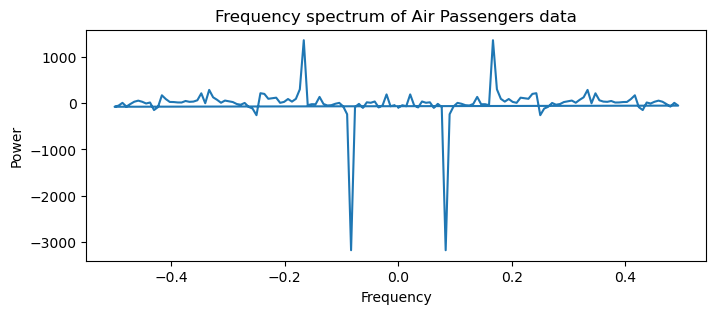

In [15]:
## Plotting in the Frequency domain
fig,ax2 = plt.subplots(figsize=(8,3))
ax2.plot(fft_x, fft_y)
ax2.set_title("Frequency spectrum of Air Passengers data")
ax2.set_xlabel("Frequency",fontsize=10)
ax2.set_ylabel("Power",fontsize=10)      ## Power is the strength of frequency
plt.show()

## Plots for the absolute frequency values only for higher frequency side
I have just included some basic operation to make the plot look more simpler to understand.

In [18]:
## y-values
fft_y = np.fft.fft(y_val_seasonal)              ## calculates the FT of the seasonal signal without containing the trend
print (f"y-values 1 --> {fft_y.shape}")
fft_y = np.abs(fft_y[:len(fft_y)//2])         ## Considers only half of the frequency range 
print (f"y-values 2 --> {fft_y.shape}")

## x-values
fft_x = np.fft.fftfreq(len(y_val_seasonal))     ## fftfreq returns the coordinates in the frequency domain for the DFT of a signal of a given length and with a given sample spacing
fft_x = fft_x[:len(fft_x)//2]                 
print (f"x-values 3 --> {fft_x.shape}")

y-values 1 --> (144,)
y-values 2 --> (72,)
x-values 3 --> (72,)


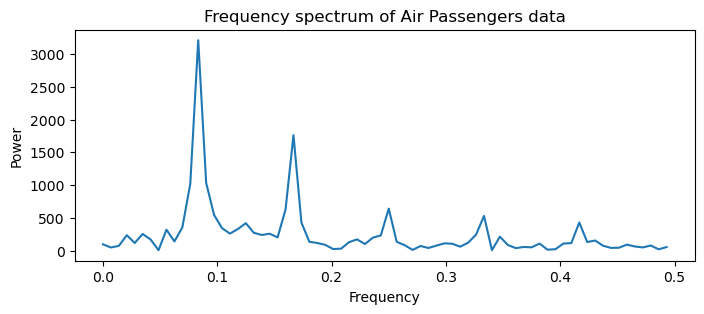

In [19]:
## Plotting in the Frequency domain
fig,ax2 = plt.subplots(figsize=(8,3))
ax2.plot(fft_x, fft_y)
ax2.set_title("Frequency spectrum of Air Passengers data")
ax2.set_xlabel("Frequency",fontsize=10)
ax2.set_ylabel("Power",fontsize=10)    ## Power is the strength of frequency
plt.show()

## Reconstruction of time-series from frequency spectrum using inverse Fourier transform

In [20]:
y_val = df_air['#Passengers'].values
y_val_trend = savgol_filter(y_val, 25,1)    ## captures the global trend (average value) with window length (l) =25 and poly degree (n)=1
y_val_seasonal = y_val - y_val_trend 

## Fourier transform and inverse fourier transform
fft_y = np.fft.fft(y_val_seasonal)
inv_fft_y = np.fft.ifft(fft_y)             ## inverse fourier transform

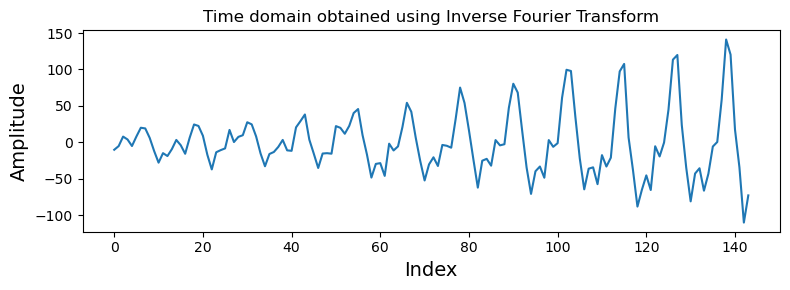

In [21]:
## Plotting the time series using inverse Fourier transform
fig,ax3 = plt.subplots(figsize=(8,3))
ax3.plot(inv_fft_y)
ax3.set_ylabel('Amplitude', fontsize=14)
ax3.set_xlabel('Index', fontsize=14)
ax3.set_title("Time domain obtained using Inverse Fourier Transform")
plt.tight_layout()
plt.show()

Since the frequency is inversely proportional to the period, the lower part of the frequency spectrum is usually more interesting than the higher frequency values. 

Low frequencies corresponds with large periods and interesting seasonal effects. High frequencies correspond with very small periods indicating local fluctuations; these are often the result of noise and not interesting.